In [ ]:
# Классификация изображений. Часть 2.

## Функции активации. Классификация изображений.



**Функция активации** нейрона определяет выходной сигнал, который, в свою очередь, определяется входным сигналом или набором входных сигналов. Функцию активации используют, чтобы получить выходные данные узла.

Функции активации делятся на два типа:

* линейные функции активации;

* нелинейные функции активации.

**Сигмоида** (Sigmoid) — возрастающая нелинейная функция, имеющая форму буквы «S». В нейронных сетях она используется потому, что позволяет усиливать слабые сигналы.

Вспомним как работает сигмоида.

Во время прямого прохода к нам приходит аргумент х и мы применяем к нему функцию сигма от х.

Обратный проход производится в графе из производных, и необходимо посчитать производную выхода сигмоиды по ее входу.

На самом деле нужно будет применить цепное правило. На вход во время обратного прохода приходит градиент потерь (это какие-то скалярные потери, например, среднеквадратичное отклонение) по выходу сигмоиды. Необходимо превратить этот градиент в производную потерь по входу сигмоиды. Для этого применяется цепное правило и производится умножение на dсигма на dх. При подсчете производной сигмоиды по ее аргументу, получится сигма * (1 - сигма).

Можно заметить проблему: когда сигмоида по своему значению близка к 0 или 1, ее производная становится очень маленькой, что означает, если присмотреться к тому, как присходит обратный проход, что происходит умножение градиента на какое-то маленькое число.

Если этих слоев много, то можно представить, что каждый раз, прокидывая градиент на все более ранние слои, умножаем его на маленькое число. Если это сделать много раз, то градиент станет практически нулевой. Это значит, что сеть на ранних слоях перестанет учиться. Эта проблема называется **проблемой угасающий градиентов**.

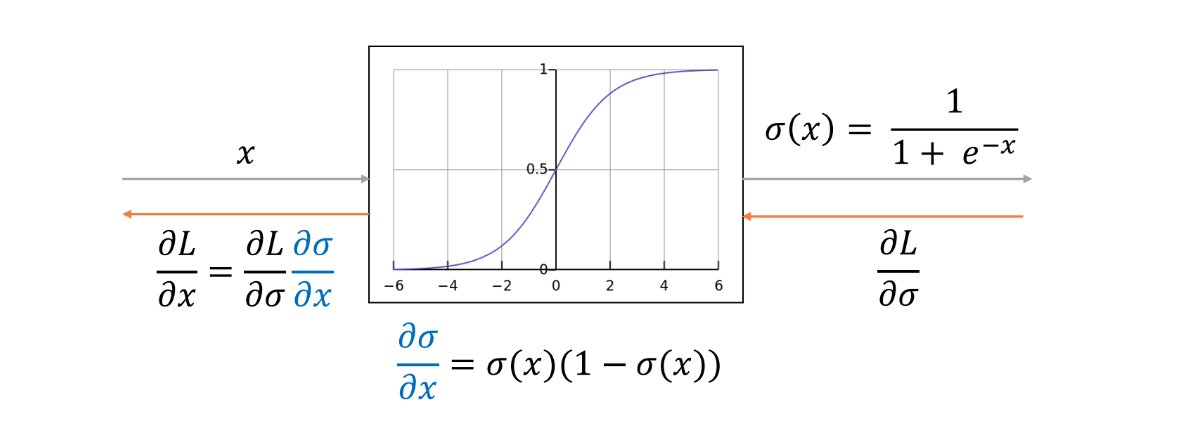

Проблемы Sigmoid-активации:

* Нейроны с сигмоидой могут насыщаться и приводить к угасающим градиентам.

* Не центрированы в нуле.

* Дорого вычислять.

К счастью, есть другие функции активации.

**Функция Tanh** похожа на сигмоиду, но её преимущество состоит в том, что отрицательные входные данные будут отображаться строго отрицательными, а нулевые входные данные будут отображаться вблизи нуля.

Характеристики Tanh активации:

* центрирована в нуле;

* но все ещё как сигмоида.


Эта функция - это гиперболический тангенс.

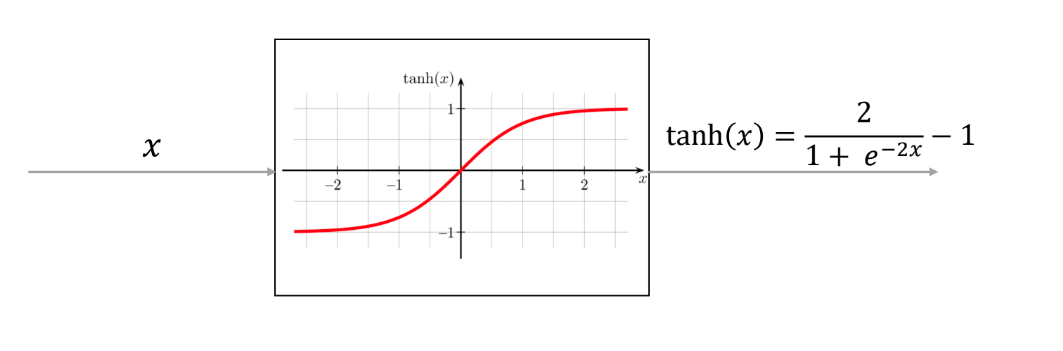

**ReLU** (rectified linear unit) является наиболее часто используемой функцией активации в мире, так как она используется практически во всех свёрточных нейронных сетях или для Deep Learning.

Характеристики ReLU активации:

* быстро считается;

* градиенты не угасают при х > 0;

* не центрирована в нуле;
* если не было активации, не будет обновления (представим, что не повезло с инициализацией весов, и вход ReLU нейрона оказывается в отрицательной полуоси. Это означает, что он преобразует это значение в ноль, и во время обратного прохода градиент в этой части тоже равен 0. То есть неудачно инициализированный нейрон может никогда не активироваться - не изменяет свои веса и остается нулем. Это приводит к лишним вычислениям).

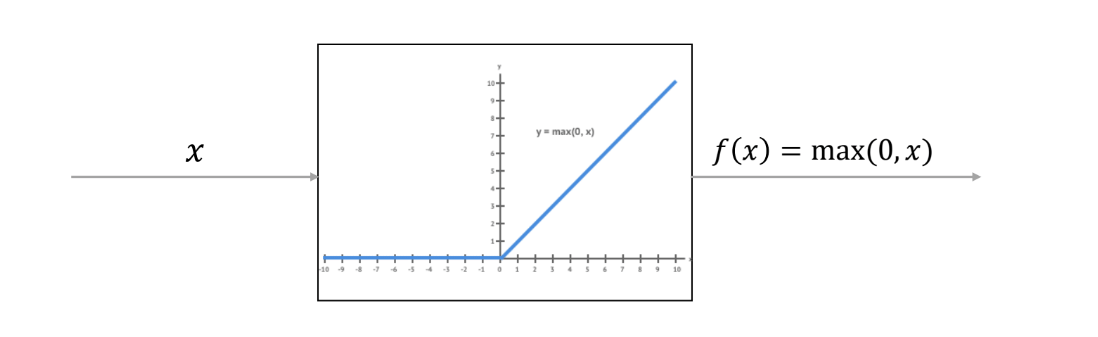

**Leaky ReLU** является попыткой решить проблему выхода ReLU из строя.

Характеристики Leaky ReLU-активации:

* всегда будут обновления (даже при неудачной инициализации нейроны не умрут, так как есть наклон *а*, и градиент может вытащить нейрон в какое-то нормальное значение);
* примерно центрирована в нуле;
* а ≠ 1 (иначе функция превратится в линейную, что плохо, так как линейные активации не позволяют сделать сложную функцию).

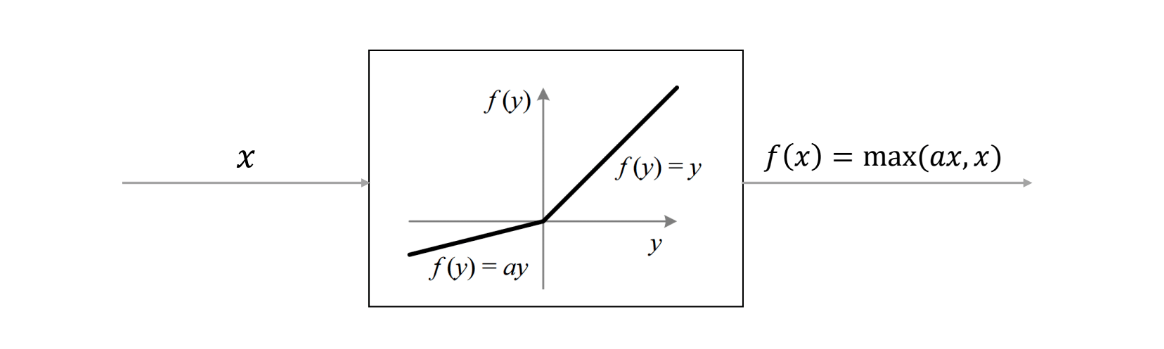

**Функция активации ELU** (Exponential Linear Unit), по результатам исследований, быстрее сводит к нулю и даёт более точные результаты.

В отрицательной части аргументов использует экспоненту.

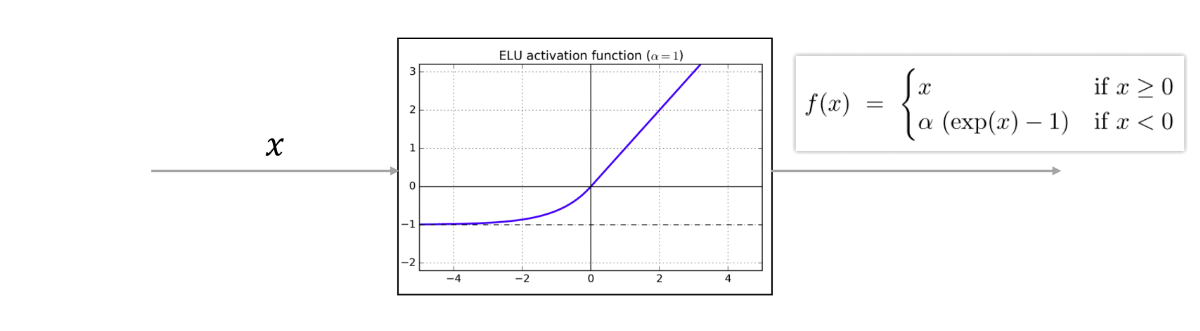

Характеристики ELU:

* примерно центрирована в нуле;
* сходимость быстрее ReLU.

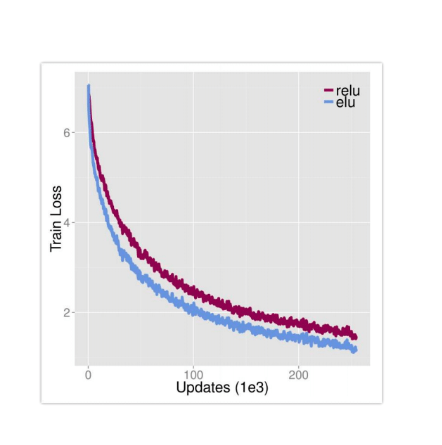

## Инициализация весов

Нейронные сети нельзя инициализировать нулевыми весами, так как в этом случае появляется эффект симметрии. Если честно посчитать градиенты функции потерь по всем параметрам, окажется, что если не будет какого-то шума при инициализации, то градиенты будут одинаковыми, обновлятся они будут также одинаково, и вся сеть становится менее мощной.

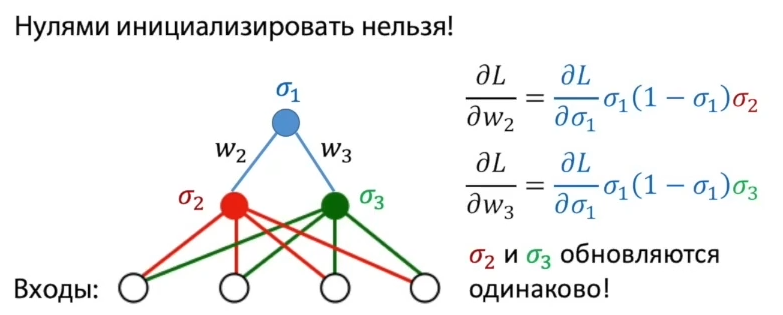

Поэтому эту симметрию нужно сломать. Для этого нужно просто инициализировать случайным шумом. Но возникает вопрос: насколько большим должен быть этот шум? Как обычно генерируется шум? Это какое-то случайное значение из стандартного нормального распределения, где среднее - 0, дисперсия - 1. Но это могут быть какие-то значения, поэтому, возможно, их необходимо умножить на какое-то маленькое число? Откуда же взять этот масштаб шума?



#### Нейрон и дисперсия до активации

Если у каждого входа нейросети среднее равно 0, и мы генерируем веса независимо от входов, то это нам гарантирует, что **среднее нейрона до активации тоже будет равно 0.**

Но дисперсия может расти, и это замедлит сходимость. Представим, что это значение линейной комбинации, которое подается в функцию активации, оно большое, и используется плохая функция активации, например, сигмоида. Это значит, что мы будем улетать у сигмоиды в "хвосты", где градиент близок к 0, что является плохим случаем, так как это замедляет сходимость из-за угасающих градентов. Поэтому необходимо оставаться в рабочей зоне функции активации, где она имеет нормальные граденты. У сигмоиды это что-то около 0 и недалеко разбросано от 0.

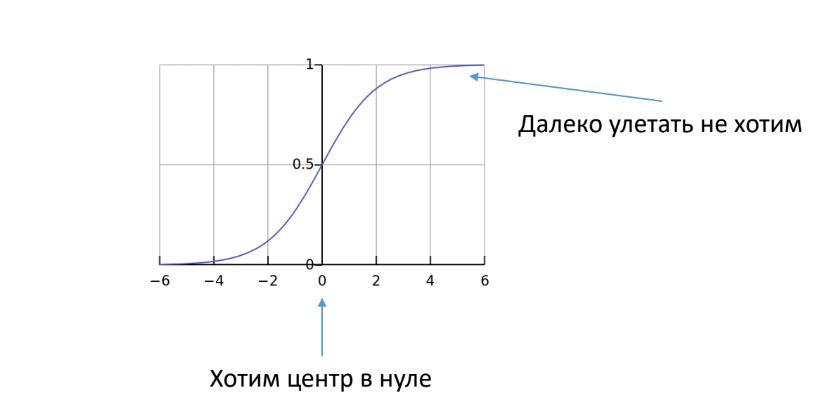

**Дисперсия суммы некоррелированных величин** — это сумма дисперсий, слагаемые некоррелированы, потому что веса, которые мы генерируем, независимы.

##### Вопросы:
- Какие функции активации Вы знаете?
- Какая по Вашему мнению наилучшая?

#### Сходимость

Гиперболический тангенс для маленьких функций (около 0) похож на линейную функцию, то есть наши ранние выкладки примерно верны, и это означает, что, так как мы гарантируем одинаковую дисперсию на разных слоях нейросети, то выход будет распределён примерно одинаково после применения функции активации и, следовательно, градиенты будут в примерно одинаковом масштабе. Этот факт позволит **ускорить сходимость.**

На картинке ниже видно, что, если использовать "наивную" инициализацию, когда не контролируется масштаб весов на разных слоях, а берется один и тот же масштаб везде, с увеличением слоя дисперсия градиентов растет. Это ломает сходимость, но если использовать инициализацию Хавьера, то на разных слоях распределение градиентов во время backpropagation римерно одинаковое. Это означает, что все веса в нейросети могут менятся примерно с одинаковой скоростью и нет никакого затухания.

Это тот эффект, которого мы хотели добиться.

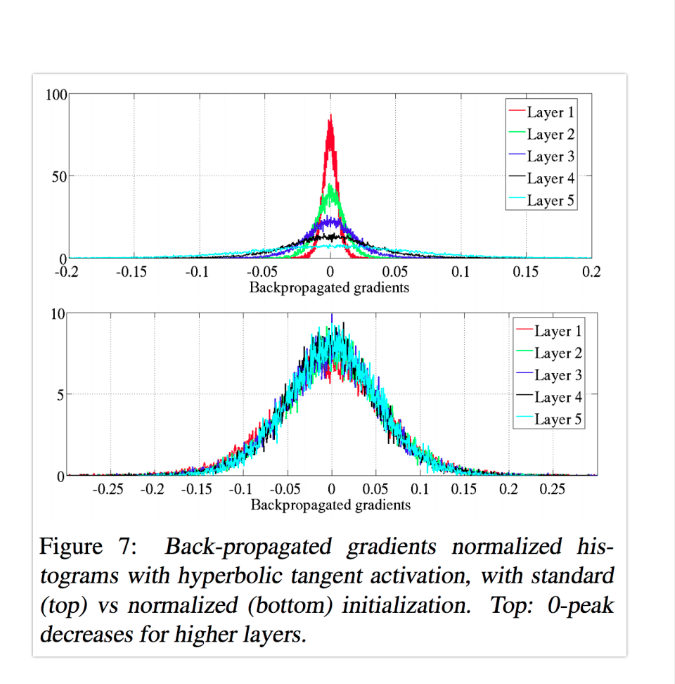

## Влияние learning rate и масштаба признаков на сходимость

Рассмотрим, как влияет масштаб признаков в линейной регрессии на сходимость градиентных методов.

Начнём с импорта библиотек. Здесь нам понадобится TensorFlow для визуализации процесса градиентного спуска и вспомогательные функции, которые будут отрисовывать анимацию.

In [ ]:
import tensorflow as tf  # Импортируем библиотеку TensorFlow, которая используется для создания и работы с нейронными сетями и моделями машинного обучения.
print("TF", tf.__version__)  # Выводим текущую версию TensorFlow для проверки, что библиотека корректно установлена.

from matplotlib import animation, rc  # Импортируем необходимые компоненты для анимации из библиотеки matplotlib.
import matplotlib.pyplot as plt  # Импортируем модуль pyplot из matplotlib для создания графиков.
from IPython.display import HTML, display_html  # Импортируем инструменты для отображения HTML-контента и взаимодействия в Jupyter Notebook.
import numpy as np  # Импортируем библиотеку numpy для работы с многомерными массивами и матрицами.
from matplotlib import pyplot as plt  # Повторный импорт pyplot для создания и отображения графиков (повторный импорт не обязателен).
from IPython.display import clear_output, display_html, HTML  # Импортируем дополнительные функции для управления выводом данных в Jupyter Notebook.
import contextlib  # Импортируем модуль contextlib, который предоставляет инструменты для работы с контекстными менеджерами.
import time  # Импортируем модуль time для работы с временными задержками и отслеживания времени выполнения.
import io  # Импортируем модуль io для работы с файловыми потоками и потоками ввода-вывода.
import urllib  # Импортируем модуль urllib для работы с URL-адресами и веб-запросами.
import base64  # Импортируем библиотеку base64 для кодирования и декодирования данных в формат Base64 (полезно для передачи данных в сети).

TF 2.17.0


#### Задача регрессии

У нас есть два признака: **x1**, **x2**, на которых настроена линейная модель для предсказания **y**:

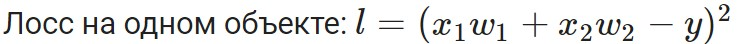

Среднеквадратичное отклонение будем рисовать в пространстве параметров при помощи линий уровня. **Линия уровня** — это множество точек, на которых функция принимает одно и то же значение.



<a list of 21 text.Text objects>

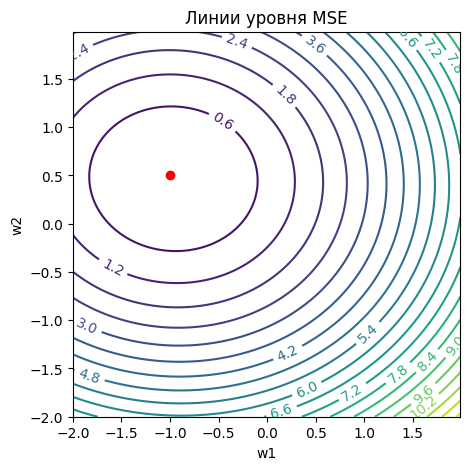

In [ ]:
# Генерация простого набора данных
np.random.seed(42)  # Устанавливаем начальное значение для генератора случайных чисел для воспроизводимости.
N = 100  # Количество точек данных.
x = np.random.randn(N, 2)  # Генерируем матрицу признаков размера N x 2 из нормального распределения.
w = np.array([[-1, 0.5]]).T  # Определяем веса, которые будут использоваться для генерации целевой переменной y.

x[:, 0] *= 1  # Множим первый признак на масштабный коэффициент (здесь 1, изменений нет), что может влиять на "долины" в лоссе.
y = x @ w + np.random.randn(N, 1) * 0.2  # Вычисляем целевую переменную y с добавлением гауссовского шума.

# Построение линий уровня функции ошибки (MSE) в пространстве весов
fig, ax = plt.subplots(figsize=(5, 5))  # Создаем фигуру и оси для графика.
W1, W2 = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01))  # Создаем сетку значений для весов w1 и w2.

# Вычисляем значение функции ошибки (среднеквадратическая ошибка - MSE) для всех комбинаций весов w1 и w2.
Z = np.mean((x.dot(np.vstack([W1.ravel(), W2.ravel()])) - y)**2, axis=0).reshape(W1.shape)

# Рисуем линии уровня для функции ошибки
contour = ax.contour(W1, W2, Z, 20)  # Создаем контурные линии для значений функции ошибки.
ax.scatter(*w, c='red')  # Отмечаем истинные значения весов красной точкой.
plt.xlabel('w1')  # Подписываем ось x.
plt.ylabel('w2')  # Подписываем ось y.
plt.title(u"Линии уровня MSE")  # Заголовок графика.

ax.clabel(contour, inline=1, fontsize=10)  # Добавляем метки значений на линии уровня.

Глядя на линии уровня, мы можем представить, как устроена трёхмерная поверхность функции двух переменных **w1** и **w2**.

Красная точка на рисунке — это оптимальный набор параметров.

Рассмотрим, как изменятся линии уровня, если ось x умножить на коэффициент 2, например:

In [ ]:
x[:, 0] *= 2  # признак x1 в x_scale раз больше (создает долины в лоссе)

<a list of 22 text.Text objects>

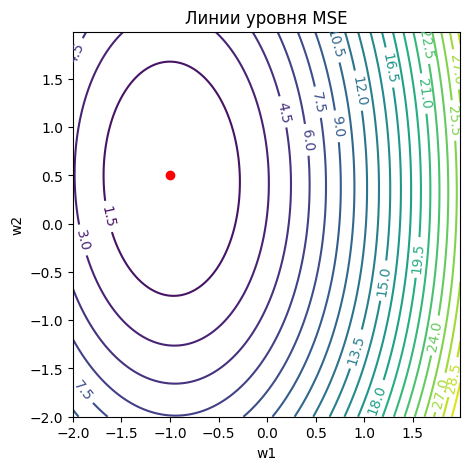

In [ ]:
# Генерация простого набора данных
np.random.seed(42)  # Устанавливаем начальное значение для генератора случайных чисел для воспроизводимости.
N = 100  # Количество точек данных.
x = np.random.randn(N, 2)  # Генерируем матрицу признаков размера N x 2 из нормального распределения.
w = np.array([[-1, 0.5]]).T  # Определяем веса, которые будут использоваться для генерации целевой переменной y.

x[:, 0] *= 2  # Множим первый признак на масштабный коэффициент (здесь 1, изменений нет), что может влиять на "долины" в лоссе.
y = x @ w + np.random.randn(N, 1) * 0.2  # Вычисляем целевую переменную y с добавлением гауссовского шума.

# Построение линий уровня функции ошибки (MSE) в пространстве весов
fig, ax = plt.subplots(figsize=(5, 5))  # Создаем фигуру и оси для графика.
W1, W2 = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01))  # Создаем сетку значений для весов w1 и w2.

# Вычисляем значение функции ошибки (среднеквадратическая ошибка - MSE) для всех комбинаций весов w1 и w2.
Z = np.mean((x.dot(np.vstack([W1.ravel(), W2.ravel()])) - y)**2, axis=0).reshape(W1.shape)

# Рисуем линии уровня для функции ошибки
contour = ax.contour(W1, W2, Z, 20)  # Создаем контурные линии для значений функции ошибки.
ax.scatter(*w, c='red')  # Отмечаем истинные значения весов красной точкой.
plt.xlabel('w1')  # Подписываем ось x.
plt.ylabel('w2')  # Подписываем ось y.
plt.title(u"Линии уровня MSE")  # Заголовок графика.

ax.clabel(contour, inline=1, fontsize=10)  # Добавляем метки значений на линии уровня.

Эллипс сузился по горизонтальной оси.

Если мы будем увеличивать масштаб **x1**, это будет сплющивать ось **w1** на графике линий уровня.

Если **x1** — большое число, то при небольшом изменении **w1** лосс изменится сильно.

Можно посчитать градиенты функций потерь по **w1** и **w2**:

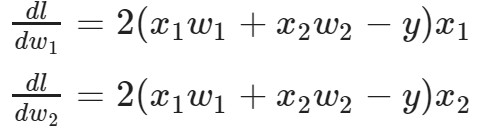

Когда **x1** и **x2** будут иметь сильно разный масштаб, градиенты по параметрам тоже будут иметь сильно разный масштаб. И это именно то, что будет ломать градиентный спуск.

Каноническое уравнение эллипса: $\frac{x_1^2}{a^2} + \frac{x_2^2}{b^2} = 1$, поэтому линии уровня лосса так выглядят.

## Batch-нормализация

После инициализации и запуска *backpropagation* нет гарантий, что дисперсия не будет расти. Для нормирования выходов нейронов (до и после активации) можно использовать **Batch-нормализацию**.

BatchNormalization (нормализация по батчам) — это метод, который помогает ускорить и стабилизировать процесс обучения нейронной сети, а также позволяет построить более глубокие и сложные модели. Этот метод нормализует активации каждого слоя, приводя их к более стабильному диапазону значений, что делает обучение более устойчивым.

> Batch-нормализация пытается нормировать каждый выход нейрона таким образом, чтобы у него были нулевое среднее и фиксированная дисперсия.

Посмотрим как это работает.

Допустим, есть выход какого-то одного нейрона hi. Из него нужно вычесть среднее и поделить на корень из дисперсии.

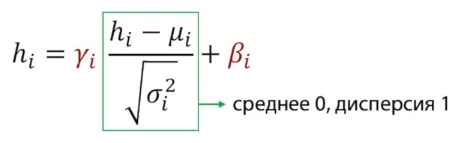

Откуда взять это среднее и сигму? Ведь это на самом деле какие-то статистические характеристики этого нейрона. Во время обучения есть батч, например, 32 объекта, и по этим 32 объектам можно прикинуть эти статистики - среднюю и дисперсию.

Оценим по текущему батчу после первого прохода *backpropagation* нужные статистики среднего и дисперсии. Возникает вопрос: почему это делается по текущему батчу? Почему это нельзя сделать по истории, например, батчей? Проблема в том, что сеть после каждого шага по градиенту меняется, и в самом начале обучения она очень сильно меняется, когда из случайных коэффициентов начинается обучение сети. Это означает, что после каждого следующего батча эти статистики "едут", и их нужно обновлять по самой свежей порции данных.

Из-за того, что во время обучения сеть все время меняется, посчитаем статистики по батчу. Обычно он большой, например, 32 или 64 объекта, что является достаточным условием для того, чтобы большая нормализация неплохо оценила эти статистики.

Как это будет работать во время тестирования? Представим, что для сети мы хотим сделать предсказание по одной картинке, то есть никакого батча нет. Получается, что статистики - среднее и сигма, оценить нельзя. Мы не будем оценивать их по тестовым картинкам, их нужно просто усреднить за несколько последних шагов обучения сети, то есть тогда, когда мы уже практически сошлись в оптимум, сеть не сильно меняется, и тогда можно взять побольше батчей для оценки статистик, чтобы они стали менее шумные. Для этого используют **экспоненциальное сглаживание**.

In [ ]:
5 4 6
2 3 100

сред = 30
дисп = 40
4 5 6

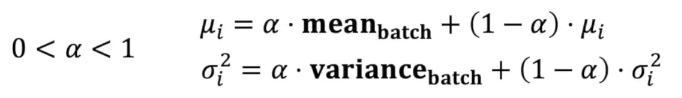

**Экспоненциальное сглаживание** работает следующим образом: когда мы получаем среднее по батчу и *Var* по батчу, мы добавляем их в накопитель с некоторым весом, а старое значение в накопителе немного дискаунтируем.

#### Что делать с γ и β?

**γ** и **β** нужны для масштабирования и сдвига активации: нейросети может быть полезно иметь, например,  не единичную дисперсию для какого-то нейрона, а большую, что поможет ей сойтись лучше.

Линейная комбинация каких-то других входов легко дифференцируется, поэтому эти коэффициенты можно добавить в  *backpropagation*, по ним будут считаться градиенты, и они будут автоматически подобраны.

**Итог.Как это работает:**
- Для каждого слоя нейронной сети вычисляется среднее значение и стандартное отклонение активаций для текущего батча (подмножества данных, обрабатываемого на текущей итерации).

- После нормализации активации сдвигаются и масштабируются с использованием двух дополнительных параметров, которые обучаются вместе с остальными весами сети. Эти параметры позволяют модели находить оптимальный диапазон активаций для каждого слоя.

**Зачем нужна BatchNormalization:**
- Нормализация активаций помогает избежать ситуаций, когда выходы нейронов становятся слишком большими или слишком маленькими (проблема исчезающего или взрывающегося градиента), что может замедлить или остановить обучение.

- Улучшение стабильности - при использовании BatchNormalization модель становится менее чувствительной к начальной инициализации весов и выбору функции активации, что помогает достичь более стабильных результатов.

- BatchNormalization также может выполнять функцию регуляризации, поскольку добавляет шум в процессе обучения (из-за нормализации по батчам), что может помочь избежать переобучения.

## Dropout-регуляризация

Зачем регуляризовывать нейросети? В современных нейросетях миллионы парамтеров, а если у функции много параметров, то она быстро переобучится, быстро получит идеальное решение на train сете.

Мы хотим эту сходимость к идеальному решению немного замедлить, тогда надеемся, что мы поймаем тот момент, когда на тесте будет хорошее качество.



Dropout-регуляризация на каждом шаге *backpropagation* **семплирует сеть** и с вероятностью р оставляет каждый нейрон, но с вероятностью 1 - р заменяет его на 0. Таким образом сеть подстраивается по частям.


**Dropout** — это метод регуляризации, применяемый для предотвращения переобучения в нейронных сетях. Суть его заключается в том, что во время обучения на каждой итерации случайно "отключается" некоторое количество нейронов в слое. Эти нейроны не участвуют в передаче данных и в обновлении весов на данной итерации. При этом каждый нейрон отключается с некоторой вероятностью, которую называют коэффициентом Dropout (например, 0.3 означает, что 30% нейронов будут случайно отключаться на каждом шаге).

#### Как работает dropout?

Во время обучения есть нейрон, и он дальше используется в следующем слое с весом w. Это означает, что нейрон, который его использует с весом w, ожидает какие-то статистические характеристики входа, что среднее и дисперсия будут определенного значения, чтобы научиться реагировать на такой вход.

Если во время обучения, нейрон был с вероятностью *p*, а с вероятностью 1 - *р* его выкидывали, то на самом деле во время тестирования имеет смысл нормирование этих весов.

Посчитаем ожидаемый вес нейрона, когда его будет использовать следующий слой с весом w. Если он с вероятностью *р* был включен, то с вероятностью *р* следующий нейрон использовал его с весом w, а с вероятностью 1 - *р* он его использовал с нулевым весом. Почему? Так как с вероятностью 1 - *р* нейрон, на который указывает стрелочка, заменяли на ноль. Это значит, что чтобы не поломать какие-то статистические ожидания следующего нейрона имеет смысл вес текущего нейрона отнормировать. Предлагается заменить его на *pw*, так как *pw* - это ожидаемый вес нейрона для следующего нейрона.

Ожидаемый вес: *p* * *w* + (1 - *p*) * 0


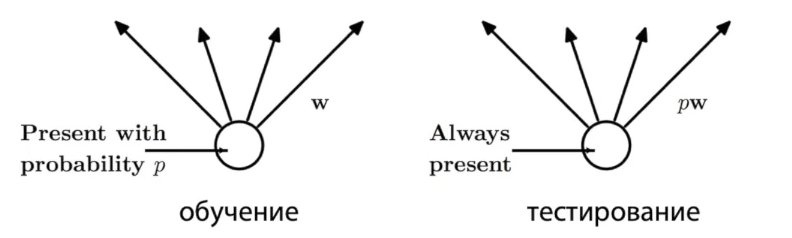

Такой подход, когда при каждом шаге *backpropagation* сеть семплируется, а во время тестирования происходит нормирование весов, приводит к тому, что это становится похожим на то, что будто было взято множество маленьких нейросетей, и далее они были объединены в одно целое. То есть у нейросети появляются подсети, которые неплохо решают нашу задачу. Эти подсети разные, они делятся параметрами.

Это не совсем честное ансамблирование моделей, но какое-то сходство здесь есть.

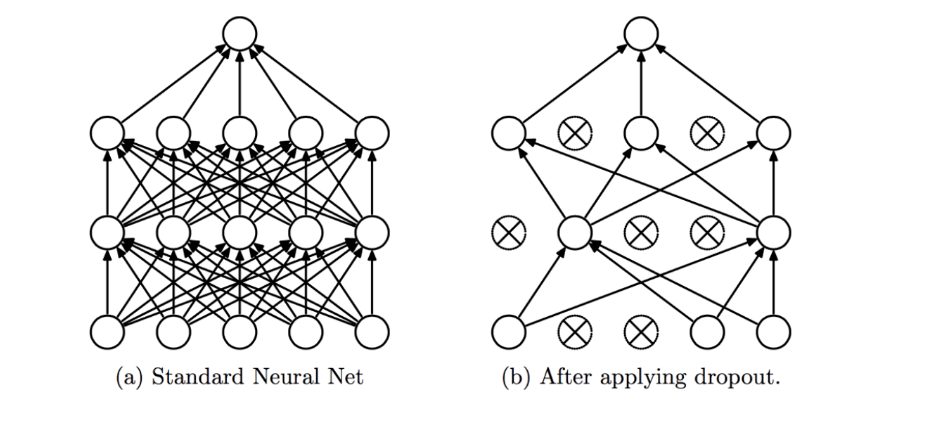

**Итог.Как это работает:**
- Во время обучения: на каждой итерации случайно выбирается подмножество нейронов, которые отключаются, и модель учится без их участия.

- Во время тестирования: Dropout не применяется, и все нейроны остаются активными. Однако выходы нейронов, использовавшихся во время обучения, масштабируются на фазе тестирования, чтобы скорректировать влияние отсутствовавших нейронов.

**Зачем нужен Dropout:**
- Борьба с переобучением: в обычной нейронной сети некоторые нейроны могут слишком сильно подстраиваться под тренировочные данные, что ухудшает способность модели обобщать на новых данных. Dropout случайно отключает нейроны, вынуждая другие нейроны брать на себя часть работы, что снижает вероятность того, что нейроны начнут слишком сильно зависеть от друг друга.
- Благодаря тому, что на каждой итерации модель обучается на разных подмножествах нейронов, это делает её более устойчивой к новым данным.

##### Вопросы:
- Как работает Dropout?
- Как работает BatchNormalization?

## Производная функции

В зависимости от того, какую величину шага в градиентном спуске learning rate вы выберете (большую или маленькую), вариации градиентного спуска будут выглядеть по-разному:

* Если learning rate **слишком большой**, это означает, что сначала оптимизация была, но остановилась и качество становится хуже, **мы выходим из оптимальной точки**.

* Если learning rate **слишком маленький**, то обучение **слишком медленное**.

* Если learning rate **недостаточно большой**, то поначалу обучение идёт отлично, а потом мы **застреваем и не двигаемся дальше**.

* Если learning rate **оптимальный**, то мы **обучаемся быстро вначале, и к концу мы выходим на оптимальную точку**.

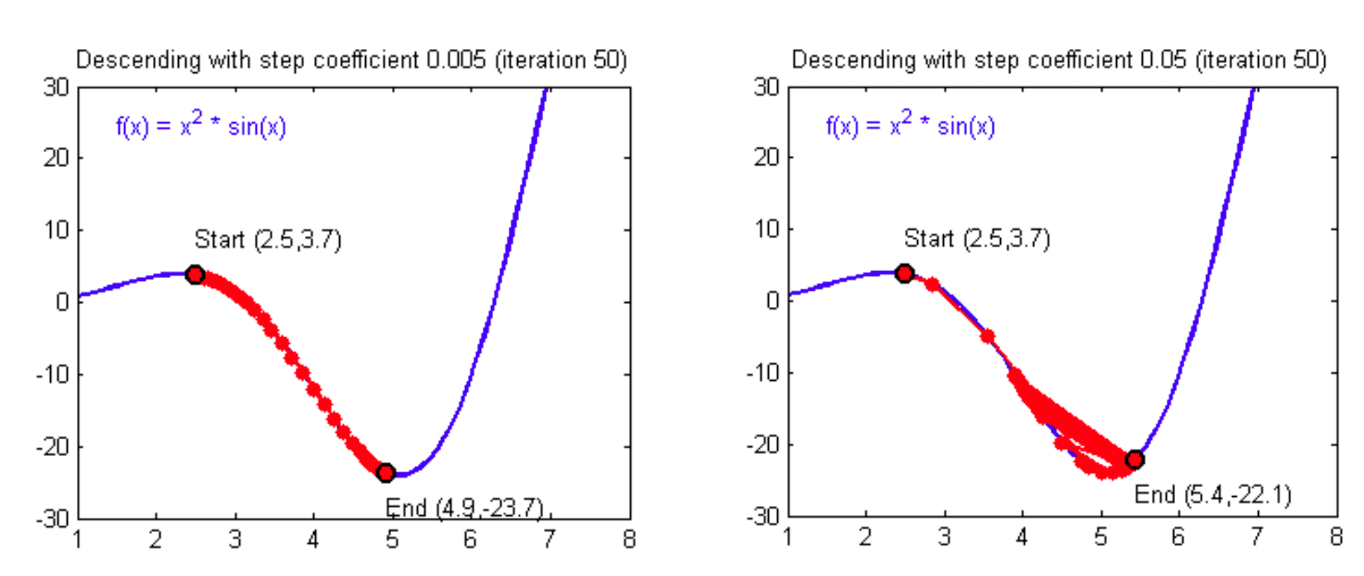

Здесь старт происходит из точки х0, но слева мы делаем это с маленьким шагом (градиентные шаги), а справа с большим. В итоге мы находим оптимальную точку.

Справа, делая большие шаги, мы застреваем, так как шаг слишком большой,и мы перепрыгиваем оптимум. Это проблема.

**Почему стоит снижать learning rate с каждой итерацией?** Если уменьшить learning rate, когда вы увидели, что обучение больше не происходит, то сеть ещё чуть-чуть доучится.



Проблема градиентного спуска — он застревает в локальных минимумах.

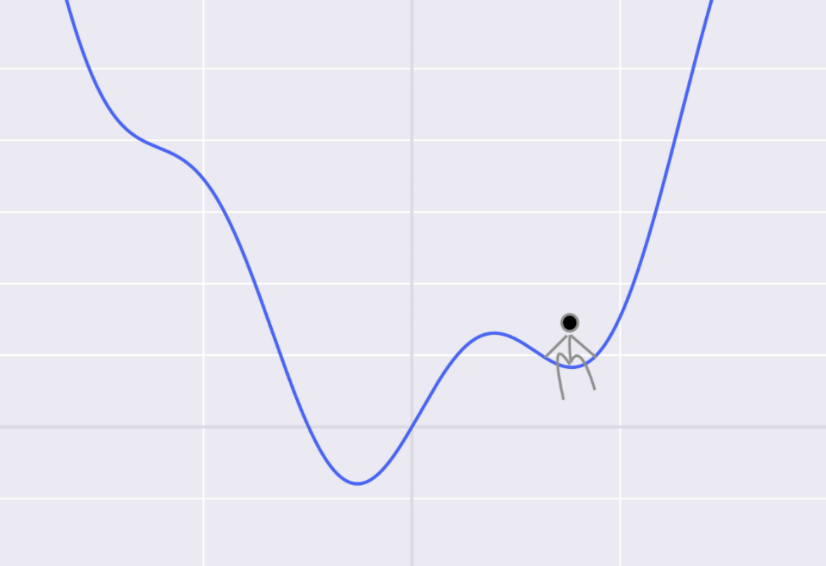

## Стохастический градиентный спуск (SGD)

**Стохастический градиентный спуск (SGD)**  является итерационным методом оптимизации с дифференцируемой целевой функцией, суть градиентного спуска — минимизировать функцию, делая небольшие шаги в сторону наискорейшего убывания функции.

Плюсы SGD:

* позволяет быстрее делать шаги и быстрее сходиться;
* траектория становится более шумной, что помогает выпрыгивать из локальных оптимумов.



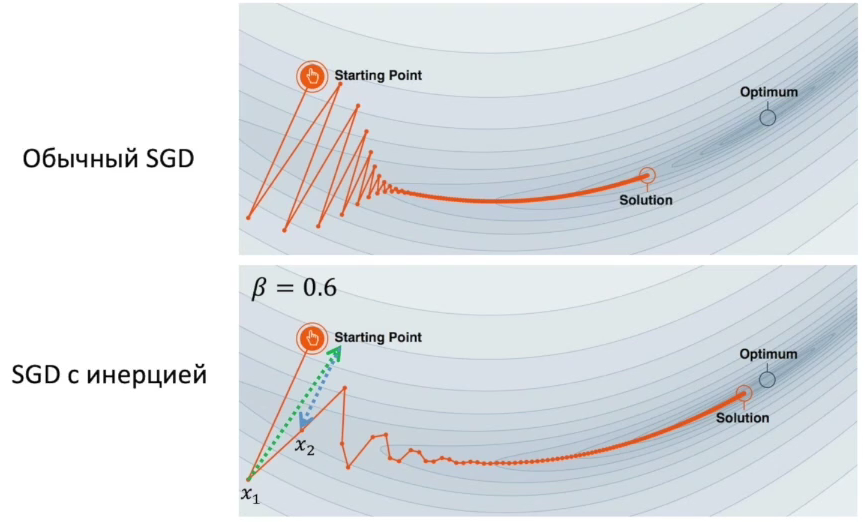

У нас есть линии уровня некоторой функции, у которой (справа) есть оптимум, и мы из оранжевой точки стартуем. Обычный стохастический спуск без момента начнет осциллировать вначале и будет медленно сходиться к оптимуму.

Посмотрим, как отличается точка х2 - положение после второго шага от обычного SGD. В моменте, первый шаг точно такой же, а дальше делаем следующее: у нас есть текущий градент - это зеленый вектор, который указвает в ту точку, в которую мы бы перешли, если бы использовали обычный SGD. Но так как у нас есть момент, то к этому вектору добавляем вектор, который равен предыдущему шагу, ум ноженному на 0,6. Мы делаем еще небольшой синий шаг, который в том же направлении, что и первый шаг, когда мы шагнули в х1, но он короче. Это значит, что наше положение х2 немного в другую сторону. Заметим, что эта масса, которая появилась у шарика, позволяет нам не асциллировать, а помогает двигаться в каком-то общем направлении быстрее. Видно, что этот момент позволяет сильно ближе приблизить к оптимуму. Это плюс.



**RMSProp — адаптивный шаг**. RMSProp — метод, в котором скорость обучения адаптируется для каждого из параметров.

Градиентные методы медленно сходятся, если градиенты по разным параметрам в разном масштабе. Как их привести в один масштаб? Если мы делали несколько маленьких шагов по какой-то переменной, то можно увеличивать шаг, чтобы не делать оптимизацию слишком медленной по некоторым переменным. То есть мы делим скорость обучения для веса на скользящее среднее значение после градиентов для этого веса.



**Adam (Adaptive Moment Estimation)** — это алгоритм оптимизации, который объединяет преимущества двух других методов: инерции (моментум) и адаптивного шага, таких как AdaGrad и RMSProp. Его используют для обучения нейронных сетей, и он особенно популярен благодаря своей эффективности и способности быстро сходиться к решению.

Давай разберем, как работает Adam и почему его предпочитают:

1. **Основная идея Adam**
Adam объединяет:
- **Моментум** (momentum): учитывает прошлые градиенты, чтобы сгладить колебания и ускорить обучение.
- **Адаптивный шаг**: подбирает индивидуальную скорость обучения для каждого параметра на основе его истории градиентов.

Таким образом, Adam обеспечивает баланс между скоростью обучения и точностью, эффективно корректируя шаг для каждого параметра на каждом шаге оптимизации.


2. **Преимущества Adam**
- **Быстрая сходимость**: благодаря моментуму Adam быстрее сходится по сравнению с обычным SGD.
- **Адаптивная скорость обучения**: для каждого параметра алгоритм подбирает индивидуальный шаг, что улучшает производительность, особенно на сложных данных.
- **Хорошо работает на разреженных данных**: Adam эффективен для больших и разреженных градиентов, что делает его полезным для задач обработки естественного языка и компьютерного зрения.
- **Меньшая потребность в настройке гиперпараметров**: хотя у Adam есть несколько гиперпараметров, стандартные значения часто работают достаточно хорошо.

3. **Когда использовать Adam?**
- Если вам нужно выбрать между различными вариациями **SGD**, например, **SGD с моментумом**, **AdaGrad**, **RMSProp**, то Adam — это отличный выбор по умолчанию, так как он сочетает преимущества всех этих методов.
- Он особенно полезен, когда у вас сложные задачи с большим количеством параметров и вы не хотите тратить много времени на ручную настройку гиперпараметров.

Adam — это стандартный и универсальный выбор для обучения большинства нейронных сетей благодаря его эффективности и способности автоматически регулировать шаг обучения.


[Более подробно в формулах](https://www.geeksforgeeks.org/adam-optimizer-in-tensorflow/)

### Какое кол-во нейронов выбрать?

**Количество нейронов в слое нейронной сети** — это гиперпараметр, который необходимо подбирать в зависимости от сложности задачи, типа данных и объема данных. При выборе количества нейронов используются следующие основные принципы:

##### 1. **Количество входных признаков**
   - **Первый слой** многослойного перцептрона часто имеет столько нейронов, сколько признаков на входе. Например, если изображение представлено как вектор длиной 784 (изображение 28x28 пикселей), то входной слой обычно содержит 784 нейрона.

   - **Другие слои** обычно уменьшают размерность по мере продвижения к выходному слою. Это связано с тем, что сеть должна постепенно извлекать и обобщать важные признаки.

##### 2. **Сложность задачи**
   - Для **простых задач**, таких как бинарная классификация или задачи с небольшим числом входных признаков (например, датасет Iris), можно использовать небольшое количество нейронов (например, 32 или 64).

   - Для **сложных задач**, таких как классификация изображений или работа с текстами, потребуется больше нейронов (например, от 128 до 1024 и более) для извлечения сложных признаков.

##### 3. **Баланс между производительностью и переобучением**
   - **Большее количество нейронов** в слое позволяет сети быть более гибкой и извлекать больше признаков из данных, что улучшает производительность на сложных задачах. Однако слишком большое количество нейронов может привести к **переобучению**.

   - **Меньшее количество нейронов** может уменьшить риск переобучения, но также может снизить способность модели находить сложные закономерности в данных.

##### 4. **Количество классов или выходных значений**
   - Количество нейронов в **выходном слое** соответствует количеству классов (если это задача классификации) или количеству выходных значений (если это задача регрессии). Например, для задачи классификации с 10 классами в выходном слое будет 10 нейронов, а для задачи регрессии — 1 нейрон.

##### 5. **Эмпирическое тестирование (эксперименты)**
   - **Подбор количества нейронов** часто выполняется на основе экспериментов и кросс-валидации. Пробуются разные архитектуры (например, 32-64-32, 128-64-32 и т.д.) для оценки, какая из них дает лучшие результаты.
   - В некоторых случаях используется **поэтапный подбор**: сначала пробуется небольшая сеть, затем постепенно увеличиваются количество нейронов и слоев до тех пор, пока модель не начнет демонстрировать хорошие результаты.

##### 6. **Архитектурные рекомендации**
   - В литературе и практике машинного обучения есть рекомендации для выбора количества нейронов. Например:
     - Для задач с небольшим числом признаков и относительно простыми зависимостями часто используют сети с 2-3 скрытыми слоями и количеством нейронов от 32 до 128.
     - Для сложных задач, таких как распознавание изображений, часто используют гораздо больше нейронов (например, 512 или 1024 нейронов на скрытый слой) и глубину до 10-20 слоев в глубоких сетях.

##### 7. **Плавное уменьшение нейронов (tapering)**
   - Часто применяют стратегию **уменьшения количества нейронов по мере углубления сети**. Например, если первый слой имеет 512 нейронов, второй слой может иметь 256, третий — 128 и так далее. Это помогает сети постепенно обобщать информацию и уменьшать сложность признаков.

### Практика

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
!pip install "scikit-learn<1.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.19.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
X, y = boston.data, boston.target

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 579.9431 - val_loss: 499.7596
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 526.3784 - val_loss: 398.0287
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 372.2182 - val_loss: 251.3230
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 241.7408 - val_loss: 98.6315
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 94.5611 - val_loss: 48.5692
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.0618 - val_loss: 40.0558
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.4065 - val_loss: 34.2115
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.7692 - val_loss: 32.2016
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.3663 - val_loss: 29.7281
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.8123 - val_loss: 28.5593
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7186 - val_loss: 27.3736
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9864


13.728851318359375

In [ ]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )))
# model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 632.0305 - val_loss: 595.7065
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 607.3822 - val_loss: 582.0900
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 567.3477 - val_loss: 571.7824
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 558.2280 - val_loss: 561.0030
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 552.0735 - val_loss: 549.2328
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 551.3435 - val_loss: 537.1254
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 548.8792 - val_loss: 524.6940
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 569.7126 - val_loss: 512.5095
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 543.3635 - val_loss: 502.5016
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 535.8640 - val_loss: 491.3265
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 515.0095 - val_loss: 480.7301
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6478 


10.887260437011719

In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4383 


11.199898719787598

### ДЗ

#### Классификация изображений из датасета CIFAR-10

Датасет CIFAR-10 содержит 60,000 цветных изображений размером 32x32, разбитых на 10 классов. Нужно предсказать класс изображения.




```
import tensorflow as tf

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
```

Не забудьте про:
- Нормализацию данных
- Преобразование меток в one-hot encoding


In [ ]:
import tensorflow as tf

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
